In [27]:
import scanpy as sc

# Load a sample dataset
adata = sc.datasets.pbmc3k()


In [32]:
# Quality control
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Filter the data to include only highly variable genes
adata = adata[:, adata.var.highly_variable]


C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


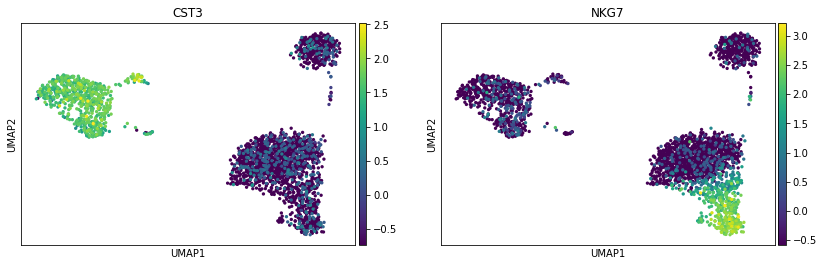

In [34]:
# Dimensionality Reduction - Perform PCA and visualize the data using UMAP.

# Scale the data
sc.pp.scale(adata, max_value=10)

# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

# Compute UMAP
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

# Plot UMAP
sc.pl.umap(adata, color=['CST3', 'NKG7'])


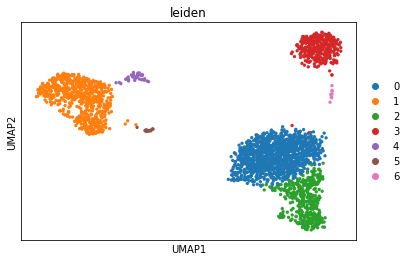

In [38]:
# Cluster the cells and visualize the results.  -  pip install leidenalg
# Cluster the data 
sc.tl.leiden(adata, resolution=0.5)

# Plot clusters
sc.pl.umap(adata, color='leiden')


C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_gen

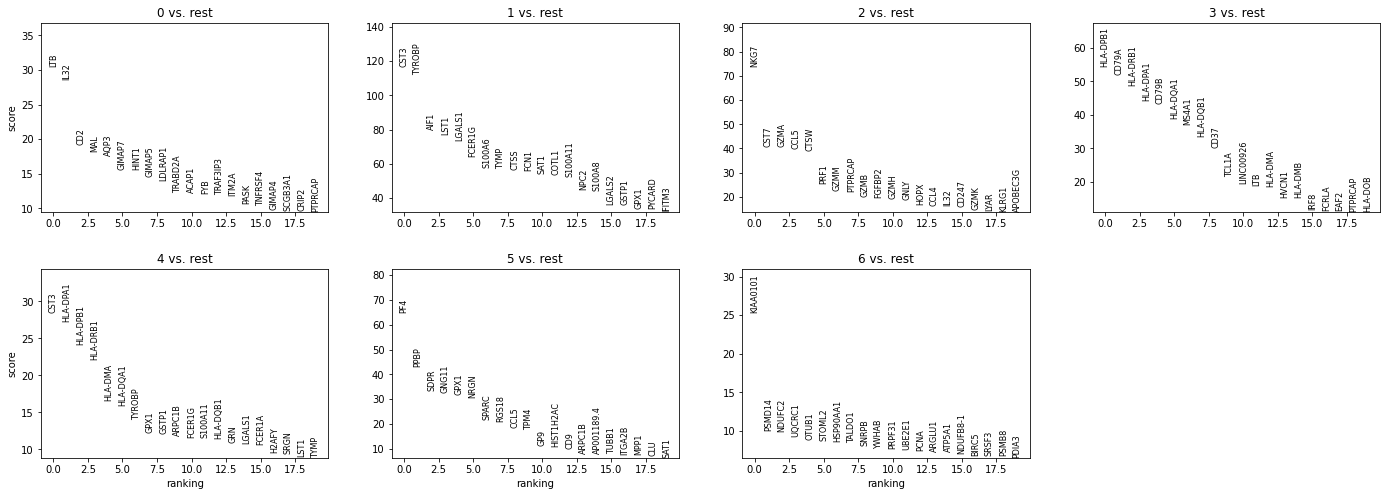

In [40]:
# Identify marker genes for each cluster
# Find marker genes
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# Plot the top markers
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
